In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('WHO-COVID-19-india-data_.csv', index_col='Date_reported', parse_dates=True)

In [5]:

df.dropna(axis=0, how='any', inplace=True)

In [6]:
df.index = pd.to_datetime(df.index)
print(df.index)

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', name='Date_reported', length=739, freq=None)


In [7]:
df.head()

,Unnamed: 0,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,,
2020-01-03,73344,IN,India,SEARO,0,0,0,0
2020-01-04,73345,IN,India,SEARO,0,0,0,0
2020-01-05,73346,IN,India,SEARO,0,0,0,0
2020-01-06,73347,IN,India,SEARO,0,0,0,0
2020-01-07,73348,IN,India,SEARO,0,0,0,0


In [8]:
print('Shape of data',df.shape)

Shape of data (739, 8)


In [9]:
df = df.loc[df['Country'] == 'India']
df.dropna(axis=0, how='any', inplace=True)
df

,Unnamed: 0,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,,
2020-01-03,73344,IN,India,SEARO,0,0,0,0
2020-01-04,73345,IN,India,SEARO,0,0,0,0
2020-01-05,73346,IN,India,SEARO,0,0,0,0
2020-01-06,73347,IN,India,SEARO,0,0,0,0
2020-01-07,73348,IN,India,SEARO,0,0,0,0
...,...,...,...,...,...,...,...,...
2022-01-06,74078,IN,India,SEARO,90928,35109286,325,482876
2022-01-07,74079,IN,India,SEARO,117100,35226386,302,483178
2022-01-08,74080,IN,India,SEARO,141986,35368372,285,483463


In [10]:
print('Shape of data',df.shape)
df.columns


Shape of data (739, 8)


Index(['Unnamed: 0', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

<AxesSubplot:xlabel='Date_reported'>

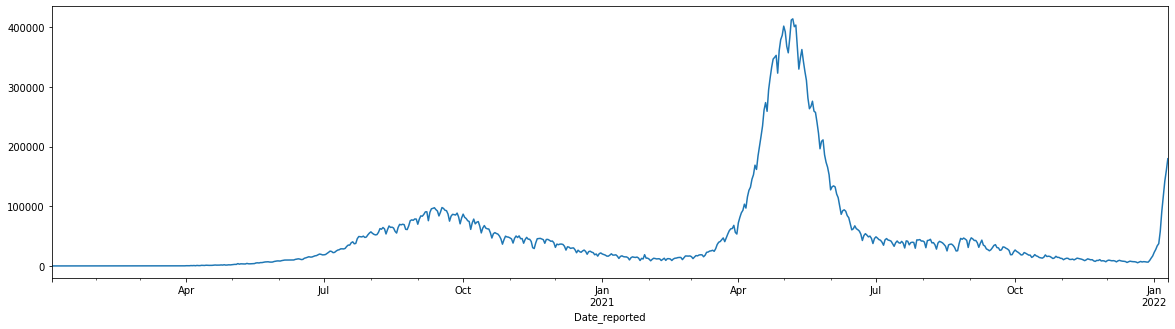

In [11]:
df['New_cases'].plot(figsize=(20,5))

In [12]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['New_cases'])

1. ADF :  -1.4929902209023866
2. P-Value :  0.5369760824634171
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression: 718
5. Critical Values :
	 1% :  -3.439490435810785
	 5% :  -2.8655738086413374
	 10% :  -2.568918067209286


In [13]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['New_cases'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14974.183, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15109.919, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15047.604, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15043.334, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15108.883, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15001.925, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15024.133, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14974.141, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14980.058, Time=0.33 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=14856.458, Time=0.93 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=15023.853, Time=0.20 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=14838.650, Time=1.21 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=15024.918, Time=0.22 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=14853.888, Time=1.01 sec
 ARIMA(4,1,3)(0,0,0

In [17]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(739, 8)
(709, 8) (30, 8)


In [19]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train['New_cases'],order=(5,1,2))
model=model.fit()
model.summary()

C:\Users\achre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\achre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\achre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\achre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\achre\App

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  709
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -7095.873
Date:                Thu, 05 May 2022   AIC                          14207.747
Time:                        16:29:39   BIC                          14244.246
Sample:                    01-03-2020   HQIC                         14221.848
                         - 12-11-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0472      0.030     -1.553      0.120      -0.107       0.012
ar.L2         -0.6240      0.027    -23.440      0.000      -0.676      -0.572
ar.L3          0.2337      0.026      8.905      0.000       0.182       0.285
ar.L4          0.0788      0.024      3.322      0.001       0.032       0.125
ar.L5         -0.2295      0.024     -9.466      0.000      -0.277      -0.182
ma.L1          0.3502      0.028     12.682      0.000       0.296       0.404
ma.L2          0.8509      0.022     38.025      0.000       0.807       0.895
sigma2      3.603e+07   5.83e-10   6.18e+16      0.000     3.6e+07     3.6e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              4614.22
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              22.07   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+32. Standard errors may be unstable.
"""

2021-12-12    8682.538151
2021-12-13    8284.467233
2021-12-14    7455.882070
2021-12-15    8074.751852
2021-12-16    8641.201606
2021-12-17    7844.805581
2021-12-18    7699.673031
2021-12-19    8574.763707
2021-12-20    8340.471773
2021-12-21    7578.832276
2021-12-22    8136.846562
2021-12-23    8633.240044
2021-12-24    7864.315684
2021-12-25    7715.063044
2021-12-26    8536.675784
2021-12-27    8322.348182
2021-12-28    7610.415188
2021-12-29    8134.497571
2021-12-30    8602.875686
2021-12-31    7881.909939
2022-01-01    7739.277681
2022-01-02    8510.024088
2022-01-03    8310.756007
2022-01-04    7641.606660
2022-01-05    8131.899062
2022-01-06    8573.169315
2022-01-07    7897.427145
2022-01-08    7761.591657
2022-01-09    8484.982145
2022-01-10    8299.897499
Freq: D, Name: ARIMA Predictions, dtype: float64


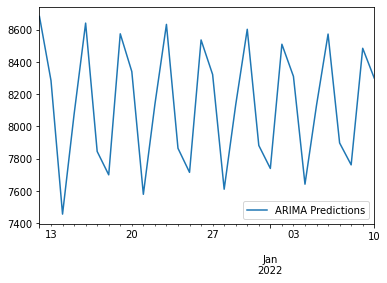

In [20]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
pred_index=df.index[start:end+1]
print(pred)